# Universidad Autónoma de Aguascalientes
# Departamento: Ciencias de la Computación
# Materia: Metaheurísticas I
# Profesor: Dr. Francisco Javier Luna Rosas
# Alumno: Haniel Joab Cruz Chávez
#### Semestre: Agosto-Diciembre 2025

## Actividad No. 3. Optimización por enjambre de partículas (PSO, por sus siglas en inglés, Particle Swarm Optimization)

### PSO es un algoritmo de optimización basado en la simulación de la conducta social de organismos, como bandadas de aves o bancos de peces. En esta practica implementaremos PSO para buscar el optimo global de una función en 2D y la graficamos: (f(x) = x^2).

## Paso 1: Importar las librerías necesarias


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import random

## Paso 2: Definir la función objetivo

In [7]:
# Definir la función objetivo
def objective_function(x):
    return x**2

## Paso 3: Inicializar los parámetros del PSO


In [8]:
# Parámetros PSO
num_particles = 30
num_dimensions = 1
num_iterations = 100
w = 0.5  # Factor de inercia que controla la velocidad
c1 = 1.5  # Coeficiente cognitivo
c2 = 2.0  # Coeficiente social

# Limites de la búsqueda
bounds = (-10, 10)

history_positions = []

## Paso 4: Inicializamos las particulas y velocidades


In [9]:
# Inicializar las partículas
particles = np.random.uniform(bounds[0], bounds[1], (num_particles, num_dimensions))
velocities = np.random.uniform(-1, 1, (num_particles, num_dimensions))

# Inicializar las mejores posiciones individuales y globales
p_best_position = particles.copy()
p_best_value = np.array([objective_function(x) for x in particles])
g_best_position = p_best_position[np.argmin(p_best_value)] #minimo valor de xi
g_best_value = np.min(p_best_value) #valor de la funcion para la mejor xi

for t in range(num_iterations):
    for i in range(num_particles):
        # Evaluar la función objetivo
        fitness = objective_function(particles[i])

        # Actualizar la mejor posición individual
        if fitness < p_best_value[i]:
            p_best_value[i] = fitness
            p_best_position[i] = particles[i].copy()

        # Actualizar la mejor posición global
        if fitness < g_best_value:
            g_best_value = fitness
            g_best_position = particles[i].copy()

    # Actualizar velocidades y posiciones
    for i in range(num_particles):
        r1 = random.random()
        r2 = random.random()

        velocities[i] = (w * velocities[i]
                         + c1 * r1 * (p_best_position[i] - particles[i])
                         + c2 * r2 * (g_best_position - particles[i]))

        particles[i] = particles[i] + velocities[i]

        # Respetar los límites de la búsqueda
        particles[i] = np.clip(particles[i], bounds[0], bounds[1])

    history_positions.append(particles.copy()) #Para graficar

    print(f"Iteración {t+1}/{num_iterations}, Mejor valor global: {g_best_value}")

print(f"Mejor posición encontrada: {g_best_position}, con valor: {g_best_value}")

Iteración 1/100, Mejor valor global: 0.021462391220281346
Iteración 2/100, Mejor valor global: [0.0015244]
Iteración 3/100, Mejor valor global: [0.00118123]
Iteración 4/100, Mejor valor global: [0.00011643]
Iteración 5/100, Mejor valor global: [7.17305583e-05]
Iteración 6/100, Mejor valor global: [1.4620763e-05]
Iteración 7/100, Mejor valor global: [1.4620763e-05]
Iteración 8/100, Mejor valor global: [1.89024835e-06]
Iteración 9/100, Mejor valor global: [1.89024835e-06]
Iteración 10/100, Mejor valor global: [1.65954467e-06]
Iteración 11/100, Mejor valor global: [1.44789809e-06]
Iteración 12/100, Mejor valor global: [1.44789809e-06]
Iteración 13/100, Mejor valor global: [1.52444395e-07]
Iteración 14/100, Mejor valor global: [2.04704429e-08]
Iteración 15/100, Mejor valor global: [2.71549104e-09]
Iteración 16/100, Mejor valor global: [1.11718659e-09]
Iteración 17/100, Mejor valor global: [1.11718659e-09]
Iteración 18/100, Mejor valor global: [1.11718659e-09]
Iteración 19/100, Mejor valor 

## Paso 5. Graficar la Función f(x) = x^2

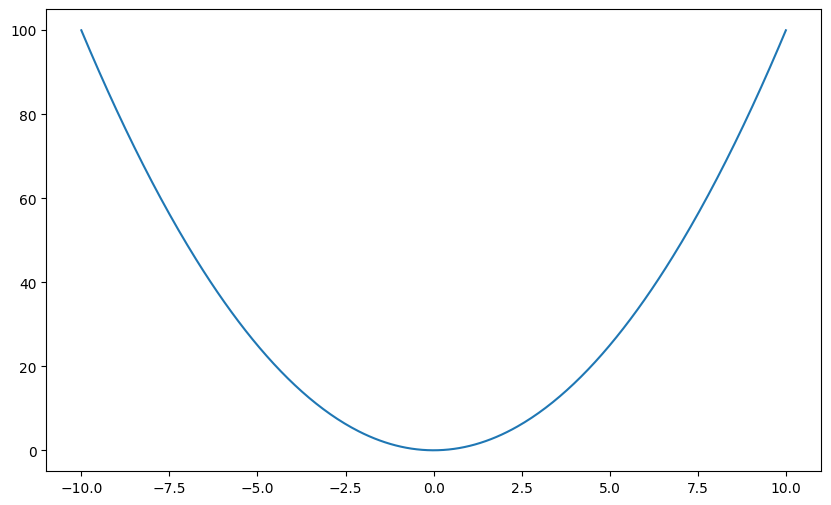

In [10]:
# Graficar la función f(x) = x^2
x_values = np.linspace(-10, 10, 400)
y_values = objective_function(x_values)

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label="f(x) = x^2")

## Paso 5.1 : Graficar la Función y la mejor posición final

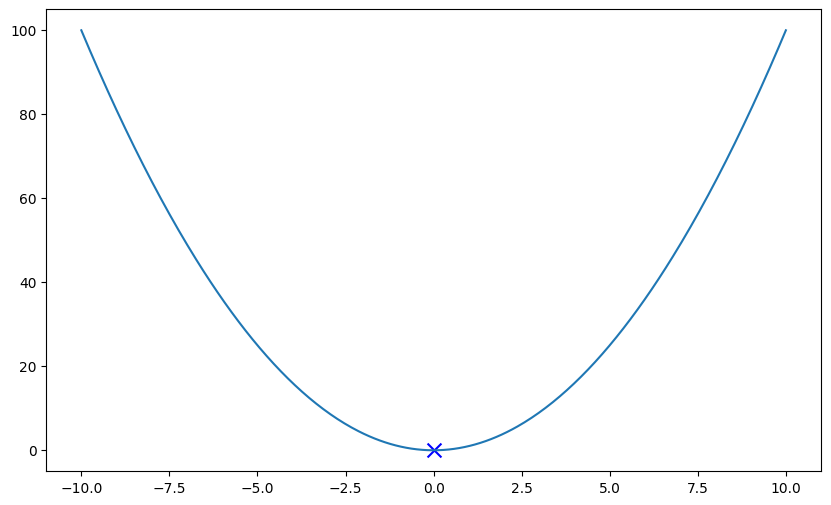

In [11]:
# Graficar la función f(x) = x^2
x_values = np.linspace(-10, 10, 400)
y_values = objective_function(x_values)


plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label="f(x) = x^2")


# Graficar la mejor posición final
plt.scatter([g_best_position], [objective_function(g_best_position)],
            color='blue', marker='x', s=100, label="Mejor posición")

## Paso 5.2 : Graficar la Función, la trayectoria de las partículas y la mejor posición final

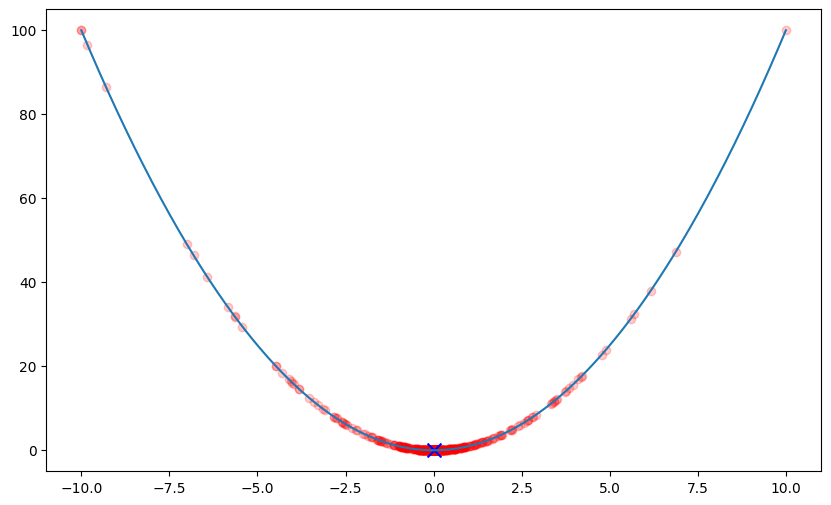

In [12]:
# Graficar la función f(x) = x^2
x_values = np.linspace(-10, 10, 400)
y_values = objective_function(x_values)


plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label="f(x) = x^2")


# Graficar la trayectoria de las partículas
for positions in history_positions:
    plt.scatter(positions, objective_function(positions), color='red', alpha=0.2)

# Graficar la mejor posición final
plt.scatter([g_best_position], [objective_function(g_best_position)],
            color='blue', marker='x', s=100, label="Mejor posición")

## Conclusiones

### PSO es un algoritmo de optimización basado en la simulación de la conducta social de organismos, como bandadas de aves o bancos de peces. En esta practica implementamos PSO para buscar el optimo global de una función en 2D y la graficamos: (f(x) = x^2).

## Bibliografia

### [1] KENNEY, James y EBERHART, Rusell C.. Particle Swarm Optimization. Neural Networks, 1995. Proceedings., IEEE International Conference on vol. 4 p. 1942-1948.